# M-H Sampling for Bi-Modal Gaussian Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.ticker import LinearLocator
from scipy.stats import norm, uniform, gumbel_r
from scipy.stats import multivariate_normal

In [2]:
# Target distribution
def p(x):
    return  0.7 * norm.pdf(x, -3, 1.5) + 0.3 * norm.pdf(x, 5, 1.5)

xMin, xMax = -8, 12
nbins = 100
xRange = np.linspace(xMin, xMax, nbins)

# 1) Using Symmetric Normal Distribution

In [3]:
# Proposal distribution
def q(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

N = 20000
acceptX = []
num_accept_samples = 0
my_sigma = 3

x0 = np.random.uniform(xMin, xMax)
acceptX.append(x0)
for i in range(N):
    xOld = acceptX[i]
    xStar = norm.rvs(loc = xOld, scale = my_sigma)
    AcceptRate = ( p(xStar) * q(xOld, xStar, my_sigma) ) / ( p(xOld) * q(xStar, xOld, my_sigma) )
    AcceptRate = np.min([AcceptRate, 1])

    u = np.random.uniform(0, 1)
    if u <= AcceptRate:
        acceptX.append(xStar)
        num_accept_samples += 1
    else:
        acceptX.append(xOld)

acceptX = np.transpose(acceptX)
accept_rate = num_accept_samples / N

Text(0.5, 1.0, 'Accept rate = 0.5491')

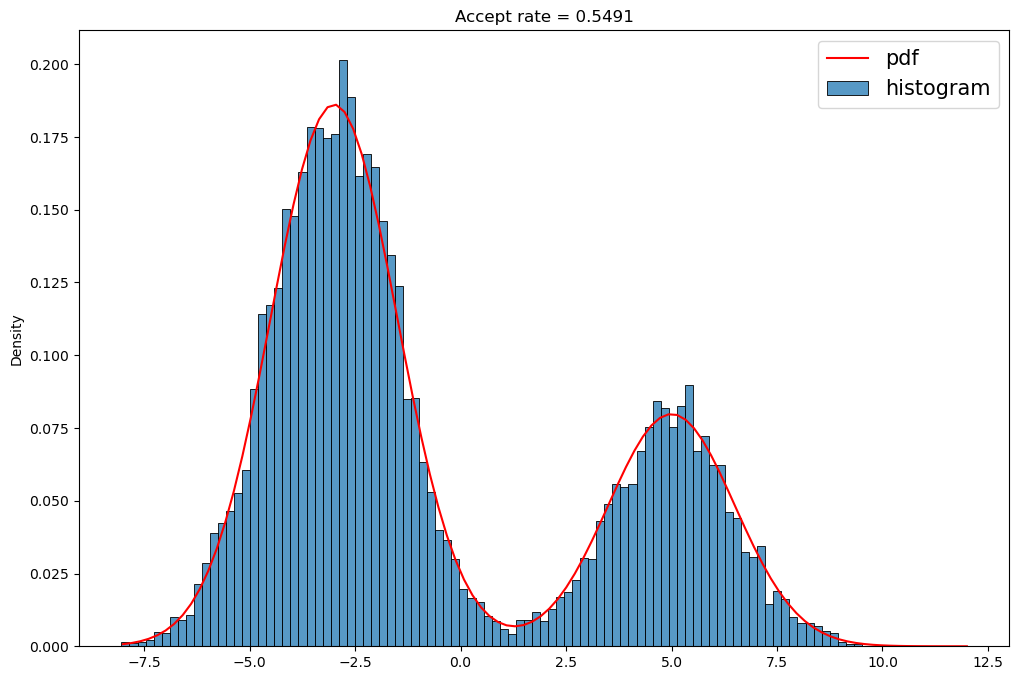

In [4]:
plt.figure(figsize = (12, 8))
sns.histplot(data = acceptX, stat='density', bins=nbins)
plt.plot(xRange, p(xRange), 'r-')
plt.legend(['pdf', 'histogram'], fontsize=15)

plt.title('Accept rate = ' + str(accept_rate))

# 2) Using Right-Skewed Gumbel Distribution

In [5]:
# Proposal distribution
def q(x, mu, sigma):
    return gumbel_r.pdf(x, mu, sigma)

N = 20000
acceptX = []
num_accept_samples = 0
my_sigma = 3

x0 = np.random.uniform(xMin, xMax)
acceptX.append(x0)
for i in range(N):
    xOld = acceptX[i]
    xStar = gumbel_r.rvs(loc = xOld, scale = my_sigma)
    AcceptRate = ( p(xStar) * q(xOld, xStar, my_sigma) ) / ( p(xOld) * q(xStar, xOld, my_sigma) )
    AcceptRate = np.min([AcceptRate, 1])

    u = np.random.uniform(0, 1)
    if u <= AcceptRate:
        acceptX.append(xStar)
        num_accept_samples += 1
    else:
        acceptX.append(xOld)

acceptX = np.transpose(acceptX)
accept_rate = num_accept_samples / N

Text(0.5, 1.0, 'Accept rate = 0.46795')

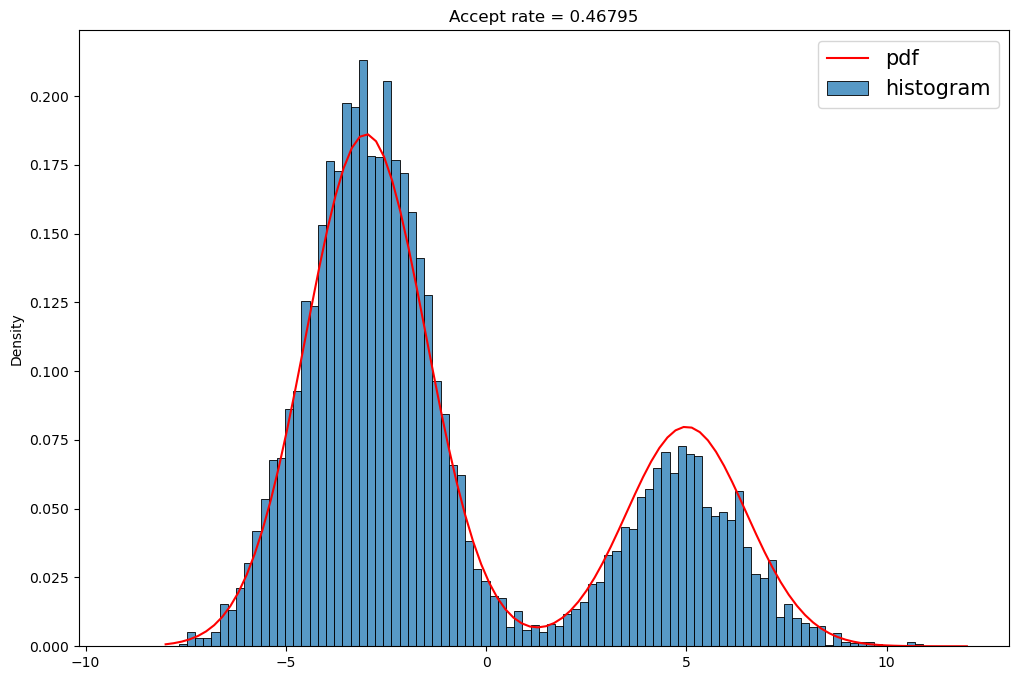

In [6]:
plt.figure(figsize = (12, 8))
sns.histplot(data = acceptX, stat='density', bins=nbins)
plt.plot(xRange, p(xRange), 'r-')
plt.legend(['pdf', 'histogram'], fontsize=15)

plt.title('Accept rate = ' + str(accept_rate))

# 3) Gumbel Sampling Using Normal Distribution

In [7]:
# Target distribution
def p(x):
    return gumbel_r.pdf(x, -1.5, 3)

xMin, xMax = -10, 20
nbins = 100
xRange = np.linspace(xMin, xMax, nbins)

In [8]:
# Proposal distribution
def q(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

N = 20000
acceptX = []
num_accept_samples = 0
my_sigma = 3

x0 = np.random.uniform(xMin, xMax)
acceptX.append(x0)
for i in range(N):
    xOld = acceptX[i]
    xStar = norm.rvs(loc = xOld, scale = my_sigma)
    AcceptRate = ( p(xStar) * q(xOld, xStar, my_sigma) ) / ( p(xOld) * q(xStar, xOld, my_sigma) )
    AcceptRate = np.min([AcceptRate, 1])

    u = np.random.uniform(0, 1)
    if u <= AcceptRate:
        acceptX.append(xStar)
        num_accept_samples += 1
    else:
        acceptX.append(xOld)

acceptX = np.transpose(acceptX)
accept_rate = num_accept_samples / N

Text(0.5, 1.0, 'Accept rate = 0.73125')

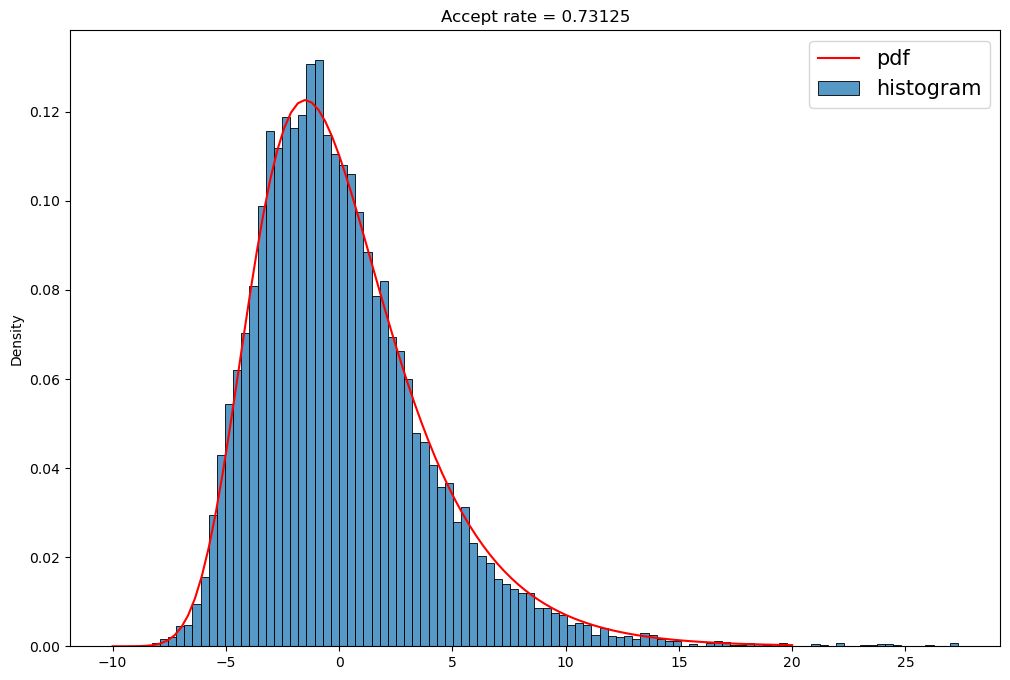

In [9]:
plt.figure(figsize = (12, 8))
sns.histplot(data = acceptX, stat='density', bins=nbins)
plt.plot(xRange, p(xRange), 'r-')
plt.legend(['pdf', 'histogram'], fontsize=15)

plt.title('Accept rate = ' + str(accept_rate))

# 4) Random Walk M-H Sampling

In [10]:
# Target distribution
def p(x):
    return  0.7 * norm.pdf(x, -3, 1.5) + 0.3 * norm.pdf(x, 5, 1.5)

xMin, xMax = -8, 12
nbins = 100
xRange = np.linspace(xMin, xMax, nbins)

In [11]:
# Proposal distribution
def q(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

N = 20000
acceptX = []
num_accept_samples = 0
my_sigma = 3

x0 = np.random.uniform(xMin, xMax)
acceptX.append(x0)
for i in range(N):
    xOld = acceptX[i]
    epsilon = norm.rvs(loc = 0, scale = my_sigma)
    xStar = xOld + epsilon
    AcceptRate = p(xStar) / p(xOld)
    AcceptRate = np.min([AcceptRate, 1])

    u = np.random.uniform(0, 1)
    if u <= AcceptRate:
        acceptX.append(xStar)
        num_accept_samples += 1
    else:
        acceptX.append(xOld)

acceptX = np.transpose(acceptX)
accept_rate = num_accept_samples / N

Text(0.5, 1.0, 'Accept rate = 0.54175')

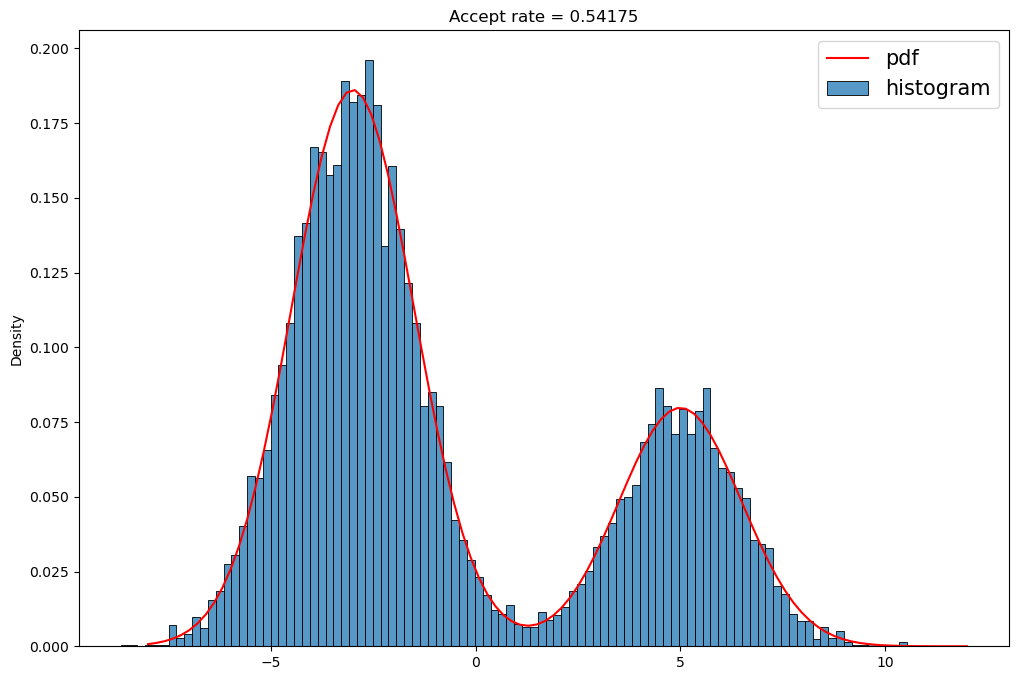

In [12]:
plt.figure(figsize = (12, 8))
sns.histplot(data = acceptX, stat='density', bins=nbins)
plt.plot(xRange, p(xRange), 'r-')
plt.legend(['pdf', 'histogram'], fontsize=15)

plt.title('Accept rate = ' + str(accept_rate))